<a href="https://colab.research.google.com/github/sunyingjian/my_python_tool/blob/master/%E5%8E%9F%E5%A7%8B_TCNkeras%E5%AE%9E%E7%8E%B0PE%E5%9B%9E%E5%BD%92_%E5%9B%A0%E6%9E%9C%E5%8D%B7%E7%A7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tcn

In [2]:
!git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 415 (delta 3), reused 0 (delta 0), pack-reused 403
Receiving objects: 100% (415/415), 202.24 MiB | 33.92 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (206/206), done.


In [3]:
! /opt/bin/nvidia-smi

Mon Feb  1 08:12:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline
from tcn import TCN
import tensorflow_addons as tfa

In [5]:
tf.__version__

'2.4.1'

In [6]:
data = pd.read_csv('/content/numpy-/TCN data.csv')
data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,7,0.557385
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,7,0.494046
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,7,0.430707
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,7,0.418039
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,7,0.405371
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0,0.432860
3228,3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0,0.398277
3229,3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0,0.378769
3230,3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0,0.373955


In [7]:
data['Well Name'].value_counts()

1    501
7    471
3    463
2    461
6    449
4    415
0    404
5     68
Name: Well Name, dtype: int64

# 分割数据集

In [8]:
test_data = data.loc[data['Well Name']==1]

In [9]:
test_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
1381,1381,0.076923,0.000000,0.489844,0.465117,0.682292,0.181401,0,1.000000,2,1,0.434634
1382,1382,0.076923,0.000911,0.369284,0.445682,0.776042,0.241224,0,0.986869,2,1,0.411705
1383,1383,0.076923,0.001821,0.414073,0.435586,0.830729,0.269206,0,0.973737,2,1,0.400811
1384,1384,0.076923,0.002732,0.352277,0.415863,0.911458,0.299118,0,0.960606,2,1,0.378389
1385,1385,0.076923,0.003643,0.336421,0.401467,0.872396,0.296223,0,0.946465,2,1,0.367241
...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1877,0.923077,0.484517,0.180390,0.525660,0.419271,0.350258,1,0.064646,3,1,0.357487
1878,1878,0.923077,0.485428,0.129315,0.530370,0.546875,0.248943,1,0.049495,3,1,0.392450
1879,1879,0.923077,0.486339,0.098091,0.532214,0.598958,0.167892,1,0.034343,8,1,0.420699
1880,1880,0.923077,0.487250,0.110403,0.536914,0.648438,0.126402,1,0.019192,8,1,0.429440


In [10]:
test_data = test_data.drop(columns=['Unnamed: 0','Well Name'])

In [11]:
test_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,PE
1381,0.076923,0.000000,0.489844,0.465117,0.682292,0.181401,0,1.000000,2,0.434634
1382,0.076923,0.000911,0.369284,0.445682,0.776042,0.241224,0,0.986869,2,0.411705
1383,0.076923,0.001821,0.414073,0.435586,0.830729,0.269206,0,0.973737,2,0.400811
1384,0.076923,0.002732,0.352277,0.415863,0.911458,0.299118,0,0.960606,2,0.378389
1385,0.076923,0.003643,0.336421,0.401467,0.872396,0.296223,0,0.946465,2,0.367241
...,...,...,...,...,...,...,...,...,...,...
1877,0.923077,0.484517,0.180390,0.525660,0.419271,0.350258,1,0.064646,3,0.357487
1878,0.923077,0.485428,0.129315,0.530370,0.546875,0.248943,1,0.049495,3,0.392450
1879,0.923077,0.486339,0.098091,0.532214,0.598958,0.167892,1,0.034343,8,0.420699
1880,0.923077,0.487250,0.110403,0.536914,0.648438,0.126402,1,0.019192,8,0.429440


In [12]:
index=data[data['Well Name'].isin([1])].index[0]

In [13]:
index

1381

In [14]:
training_data = data.drop(index = [i for i in range(1381,1882)])

In [15]:
training_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,7,0.557385
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,7,0.494046
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,7,0.430707
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,7,0.418039
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,7,0.405371
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0,0.432860
3228,3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0,0.398277
3229,3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0,0.378769
3230,3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0,0.373955


In [16]:
train_data = training_data.drop(columns=['Well Name','Unnamed: 0'])

In [17]:
train_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,PE
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,0.557385
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,0.494046
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,0.430707
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,0.418039
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,0.405371
...,...,...,...,...,...,...,...,...,...,...
3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0.432860
3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0.398277
3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0.378769
3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0.373955


In [18]:
train_data =  train_data.reset_index(drop=True)

In [19]:
test_data = test_data.reset_index(drop=True)

In [20]:
train_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,PE
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,0.557385
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,0.494046
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,0.430707
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,0.418039
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,0.405371
...,...,...,...,...,...,...,...,...,...,...
2726,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0.432860
2727,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0.398277
2728,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0.378769
2729,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0.373955


In [21]:
len(test_data)

501

# 切割步长

In [22]:
training_data = training_data.values

In [23]:
seq_length = 100
data_ = []
for i in range(len(train_data)-seq_length):
  if training_data[i,-2]!=training_data[i+seq_length,-2]:
    continue
  data_.append(train_data.iloc[i:i+seq_length])

In [24]:
data_ = np.array([df.values for df in data_])

In [25]:
data_.shape

(2063, 100, 10)

In [26]:
X = data_[:,:,:9]

In [27]:
X.shape

(2063, 100, 9)

In [28]:
Y = data_[:,:,-1]

In [29]:
Y.shape

(2063, 100)

In [30]:
data_test = []
for i in range(len(test_data)-seq_length):
    data_test.append(test_data.iloc[i:i+seq_length])

In [31]:
data_test = np.array([df.values for df in data_test])

In [32]:
data_test.shape

(401, 100, 10)

In [33]:
test_x = data_test[:,:,:9]

In [34]:
test_y = data_test[:,:,-1]

# TCN网络

In [35]:
input = tf.keras.Input(shape =(100,9))

In [36]:
x = TCN(nb_filters=32,dropout_rate=0.3,return_sequences=True,use_weight_norm=True)(input)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu',kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(1)(x)

In [37]:
model = tf.keras.Model(inputs = input,outputs = x)

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 100, 32)           47692     
_________________________________________________________________
dense (Dense)                (None, 100, 64)           2112      
_________________________________________________________________
dense_1 (Dense)              (None, 100, 32)           2080      
_________________________________________________________________
dense_2 (Dense)              (None, 100, 1)            33        
Total params: 51,917
Trainable params: 28,417
Non-trainable params: 23,500
_________________________________________________________________


In [39]:
#学习率衰减
learning_rate=0.01

Lr_change=tf.keras.callbacks.ReduceLROnPlateau('val_mae',patience = 20, factor = 0.5, min_lr=0.0001)
#保存准确率最好的模型
from keras.callbacks import ModelCheckpoint
filepath="best_weight.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True,mode='min')
Adam=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=Adam,loss='mse',metrics=['mae'])

In [40]:
history=model.fit( X,Y,batch_size=128,
         epochs=100, 
         callbacks=[Lr_change,checkpoint],
         validation_data=(test_x,test_y))

Epoch 1/300
17/17 [==============================] - 14s 145ms/step - loss: 2.6601 - mae: 0.9857 - val_loss: 0.2812 - val_mae: 0.1183

Epoch 00001: val_mae improved from inf to 0.11830, saving model to best_weight.h5
Epoch 2/300
17/17 [==============================] - 0s 25ms/step - loss: 0.2746 - mae: 0.1366 - val_loss: 0.2176 - val_mae: 0.0807

Epoch 00002: val_mae improved from 0.11830 to 0.08066, saving model to best_weight.h5
Epoch 3/300
17/17 [==============================] - 0s 23ms/step - loss: 0.2127 - mae: 0.0913 - val_loss: 0.1818 - val_mae: 0.0686

Epoch 00003: val_mae improved from 0.08066 to 0.06859, saving model to best_weight.h5
Epoch 4/300
17/17 [==============================] - 0s 21ms/step - loss: 0.1790 - mae: 0.0819 - val_loss: 0.1573 - val_mae: 0.0689

Epoch 00004: val_mae did not improve from 0.06859
Epoch 5/300
17/17 [==============================] - 0s 22ms/step - loss: 0.1554 - mae: 0.0787 - val_loss: 0.1386 - val_mae: 0.0675

Epoch 00005: val_mae improved

KeyboardInterrupt: ignored

In [ ]:
history.history.keys()

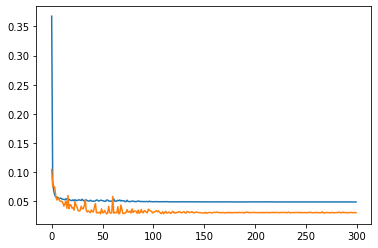

In [ ]:
plt.plot(history.epoch,history.history.get('mae'),label='mae')
plt.plot(history.epoch,history.history.get('val_mae'),label='val_mae')

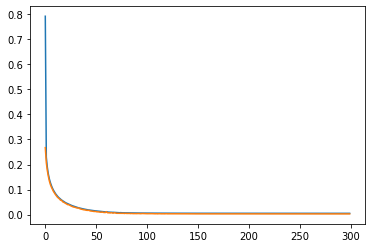

In [ ]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')

## 开始预测

In [41]:
import sklearn
from sklearn import metrics
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
test_true_y = test_data['PE'].values

In [43]:
def help(model,test_x,test_true_y):
  y_pred = model.predict(test_x)
  y_pred1 = y_pred[1,:50,:]
  y_pred_2 = y_pred[:,50,:]
  y_pred_3 = y_pred[-1,50:,:]
  y_pred_true = np.append(y_pred1,y_pred_2)
  y_pred_true = np.append(y_pred_true,y_pred_3)
  print(f'MAE={metrics.mean_absolute_error(test_true_y,y_pred_true)}')
  print(f'可决系数R2:{r2_score(test_true_y,y_pred_true)}')

In [ ]:
help(model,test_x,test_true_y)

MAE=0.029125871492888703
可决系数R2:0.7099461290502216


#预测缺失数据

In [ ]:
block_data = pd.read_csv('/content/numpy-/block_TCN_处理完成.csv')

In [ ]:
block_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies
0,0,0.076923,0.000000,0.575189,0.289898,0.464680,0.348468,0.0,1.000000,3
1,1,0.076923,0.001996,0.604475,0.272564,0.647994,0.433656,0.0,0.973764,3
2,2,0.076923,0.003992,0.617873,0.270173,0.690625,0.473574,0.0,0.948537,3
3,3,0.076923,0.005988,0.623511,0.270173,0.669310,0.488738,0.0,0.922301,3
4,4,0.076923,0.007984,0.612382,0.265989,0.618152,0.473351,0.0,0.896065,3
...,...,...,...,...,...,...,...,...,...,...
900,900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,1.0,0.399596,4
901,901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,1.0,0.387487,6
902,902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,1.0,0.375378,6
903,903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,1.0,0.363269,6


In [ ]:
block_data = block_data.drop(columns=['Unnamed: 0'])

In [ ]:
block_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies
0,0.076923,0.000000,0.575189,0.289898,0.464680,0.348468,0.0,1.000000,3
1,0.076923,0.001996,0.604475,0.272564,0.647994,0.433656,0.0,0.973764,3
2,0.076923,0.003992,0.617873,0.270173,0.690625,0.473574,0.0,0.948537,3
3,0.076923,0.005988,0.623511,0.270173,0.669310,0.488738,0.0,0.922301,3
4,0.076923,0.007984,0.612382,0.265989,0.618152,0.473351,0.0,0.896065,3
...,...,...,...,...,...,...,...,...,...
900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,1.0,0.399596,4
901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,1.0,0.387487,6
902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,1.0,0.375378,6
903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,1.0,0.363269,6


## 处理block PE数据

In [ ]:
blind = pd.read_csv('/content/numpy-/block_PE.csv')

In [ ]:
blind

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,3
1,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,3
2,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,3
3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,3
4,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,3
...,...,...,...,...,...,...,...,...,...,...,...
900,C LM,KIMZEY A,3136.0,86.023,0.688,10.949,11.7335,NaN,2,0.405,4
901,C LM,KIMZEY A,3136.5,101.037,0.732,10.179,12.0085,NaN,2,0.393,6
902,C LM,KIMZEY A,3137.0,153.374,0.748,8.198,13.4390,NaN,2,0.381,6
903,C LM,KIMZEY A,3137.5,144.117,0.672,9.188,13.4390,NaN,2,0.369,6


In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [ ]:
print('\nLabelEncoder处理：对特征进行硬编码：0----n-1（先进行缺省值填充）')
# # LabelEncoder
cat_cols = []
for col in tqdm([f for f in blind.select_dtypes('object').columns]):
    le = LabelEncoder()
    blind[col] = le.fit_transform(blind[col])
    cat_cols.append(col)

100%|██████████| 2/2 [00:00<00:00, 1251.28it/s]


LabelEncoder处理：对特征进行硬编码：0----n-1（先进行缺省值填充）


In [ ]:
blind

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,1,0,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,3
1,1,0,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,3
2,1,0,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,3
3,1,0,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,3
4,1,0,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,3
...,...,...,...,...,...,...,...,...,...,...,...
900,12,1,3136.0,86.023,0.688,10.949,11.7335,NaN,2,0.405,4
901,12,1,3136.5,101.037,0.732,10.179,12.0085,NaN,2,0.393,6
902,12,1,3137.0,153.374,0.748,8.198,13.4390,NaN,2,0.381,6
903,12,1,3137.5,144.117,0.672,9.188,13.4390,NaN,2,0.369,6


In [ ]:
block_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies
0,0.076923,0.000000,0.575189,0.289898,0.464680,0.348468,0.0,1.000000,3
1,0.076923,0.001996,0.604475,0.272564,0.647994,0.433656,0.0,0.973764,3
2,0.076923,0.003992,0.617873,0.270173,0.690625,0.473574,0.0,0.948537,3
3,0.076923,0.005988,0.623511,0.270173,0.669310,0.488738,0.0,0.922301,3
4,0.076923,0.007984,0.612382,0.265989,0.618152,0.473351,0.0,0.896065,3
...,...,...,...,...,...,...,...,...,...
900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,1.0,0.399596,4
901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,1.0,0.387487,6
902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,1.0,0.375378,6
903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,1.0,0.363269,6


In [ ]:
blind = blind.values

In [ ]:
data_block = []
for i in range(len(block_data)-seq_length):
  if blind[i,1]!=blind[i+seq_length,1]:
    continue
  data_block.append(block_data.iloc[i:i+seq_length])

In [ ]:
data_block = np.array([df.values for df in data_block])

In [ ]:
data_block.shape

(705, 100, 9)

In [ ]:
data_block_x = data_block[:,:,:]

In [ ]:
block_pred = model.predict(data_block_x)

In [ ]:
block_pred

array([[[0.337299  ],
        [0.32023403],
        [0.3141228 ],
        ...,
        [0.39382586],
        [0.42168322],
        [0.43210062]],

       [[0.32023403],
        [0.3141228 ],
        [0.31149125],
        ...,
        [0.42168322],
        [0.43210062],
        [0.51782507]],

       [[0.3141228 ],
        [0.31149125],
        [0.31240118],
        ...,
        [0.43210062],
        [0.51782507],
        [0.503653  ]],

       ...,

       [[0.4480857 ],
        [0.4675441 ],
        [0.49471232],
        ...,
        [0.35791507],
        [0.37921703],
        [0.40730268]],

       [[0.4675441 ],
        [0.49471232],
        [0.4929993 ],
        ...,
        [0.37921703],
        [0.40730268],
        [0.4083005 ]],

       [[0.4947123 ],
        [0.4929993 ],
        [0.4639303 ],
        ...,
        [0.40730268],
        [0.4083005 ],
        [0.38753584]]], dtype=float32)

In [ ]:
y_pred1 = y_pred[1,:50,:]
y_pred_2 = y_pred[:,50,:]
y_pred_3 = y_pred[-1,50:,:]
y_pred_true = np.append(y_pred1,y_pred_2)
y_pred_true = np.append(y_pred_true,y_pred_3)